In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import h5py
import json
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator
import warnings
warnings.filterwarnings('ignore')
import os
import seaborn as sns
import random
import os
import pickle
from scipy.interpolate import interp1d
from scipy.optimize import brentq
from sklearn import metrics


## Getting the evaluation results for different AR Orders 

In [2]:
from collections import defaultdict


def read_dataset(dname):
    
    model=["LDA","SVM","NB","KNN","RF","LR"]
    kind=["PSD","AR","Both"]
    pp=[1,2,3,4,5,10]
    temp_psd= defaultdict(list)
    temp_ar= defaultdict(list)
    temp_both= defaultdict(list)
    temp= {}
    
    ERPCORE_AR_path='../Results/'+dname+'/Experiments/Only_AR_Features/AR_Order.csv'
    ERPCORE_PSD_path='../Results/'+dname+'/Experiments/Only_PSD_Features/PSD_results.csv'
    ERPCORE_AR_PSD_path='../Results/'+dname+'/Experiments/Both_AR_PSD_Features/AR_PSD.csv'

    df_ERPCORE_AR=pd.read_csv(ERPCORE_AR_path, index_col=False)
    df_ERPCORE_AR=df_ERPCORE_AR.drop(columns='Unnamed: 0')
    df_ERPCORE_AR.rename(columns={'AR_PSD': 'AR'}, inplace=True)

    df_ERPCORE_PSD=pd.read_csv(ERPCORE_PSD_path, index_col=False)
    df_ERPCORE_PSD=df_ERPCORE_PSD.drop(columns='Unnamed: 0')

    df_ERPCORE_AR_PSD=pd.read_csv(ERPCORE_AR_PSD_path, index_col=False)
    df_ERPCORE_AR_PSD=df_ERPCORE_AR_PSD.drop(columns='Unnamed: 0')
    
    
    df_brain_AR=df_ERPCORE_AR[df_ERPCORE_AR['eval Type']=='Open Set']
    df_brain_PSD=df_ERPCORE_PSD[df_ERPCORE_PSD['eval Type']=='Open Set']
    df_brain_AR_PSD=df_ERPCORE_AR_PSD[df_ERPCORE_AR_PSD['eval Type']=='Open Set']
    
    
    grouped_df_AR=df_brain_AR.groupby(['pipeline', 'AR_order']).agg({
                    'eer': lambda x: f'{np.mean(x)*100:.2f}',
                    #'frr_1_far': lambda x: f'{np.mean(x)*100:.3f}'
                }).reset_index()
    grouped_df_AR.rename(columns={'eer':'AR_eer'}, inplace=True)
    #grouped_df_AR

    grouped_df_PSD=df_brain_PSD.groupby(['pipeline', 'PSD']).agg({
                    'eer': lambda x: f'{np.mean(x)*100:.2f}',
                    #'frr_1_far': lambda x: f'{np.mean(x)*100:.3f}'
                }).reset_index()
    grouped_df_PSD.rename(columns={'eer':'PSD_eer'}, inplace=True)


    grouped_df_AR_PSD=df_brain_AR_PSD.groupby(['pipeline', 'AR_PSD_order']).agg({
                    'eer': lambda x: f'{np.mean(x)*100:.2f}',
                    #'frr_1_far': lambda x: f'{np.mean(x)*100:.3f}'
                }).reset_index()
    grouped_df_AR_PSD.rename(columns={'eer':'AR_PSD_eer'}, inplace=True)        
    
    
    
    
    for i in model:
        name='AR+'+i
        t =list(grouped_df_AR[grouped_df_AR['pipeline'] == name]['AR_eer'].astype(float))
        for j in pp:
            #print(name,j, len(t))
            temp_ar[j].append(t[j-1])     
    temp["AR"]= temp_ar
    
    for i in model:
        name='PSD+'+i
        t =list(grouped_df_PSD[grouped_df_PSD['pipeline'] == name]['PSD_eer'].astype(float))
        for j in pp:
            #print(name,j, len(t))
            temp_psd[j].append(t[0])     
    temp["PSD"]= temp_psd
    
    for i in model:
        name='AR+PSD+'+i
        t =list(grouped_df_AR_PSD[grouped_df_AR_PSD['pipeline'] == name]['AR_PSD_eer'].astype(float))
        for j in pp:
            #print(name,j, len(t))
            temp_both[j].append(t[j-1])     
    temp["Both"]= temp_both
    
    
    return temp

BrainInvaders15a
COG_BCI_Flanker
ERPCORE_N400
ERPCORE_P300
Huebner_LLP
Lee2019
Mantegna2019
Sosulski2019
Won2022


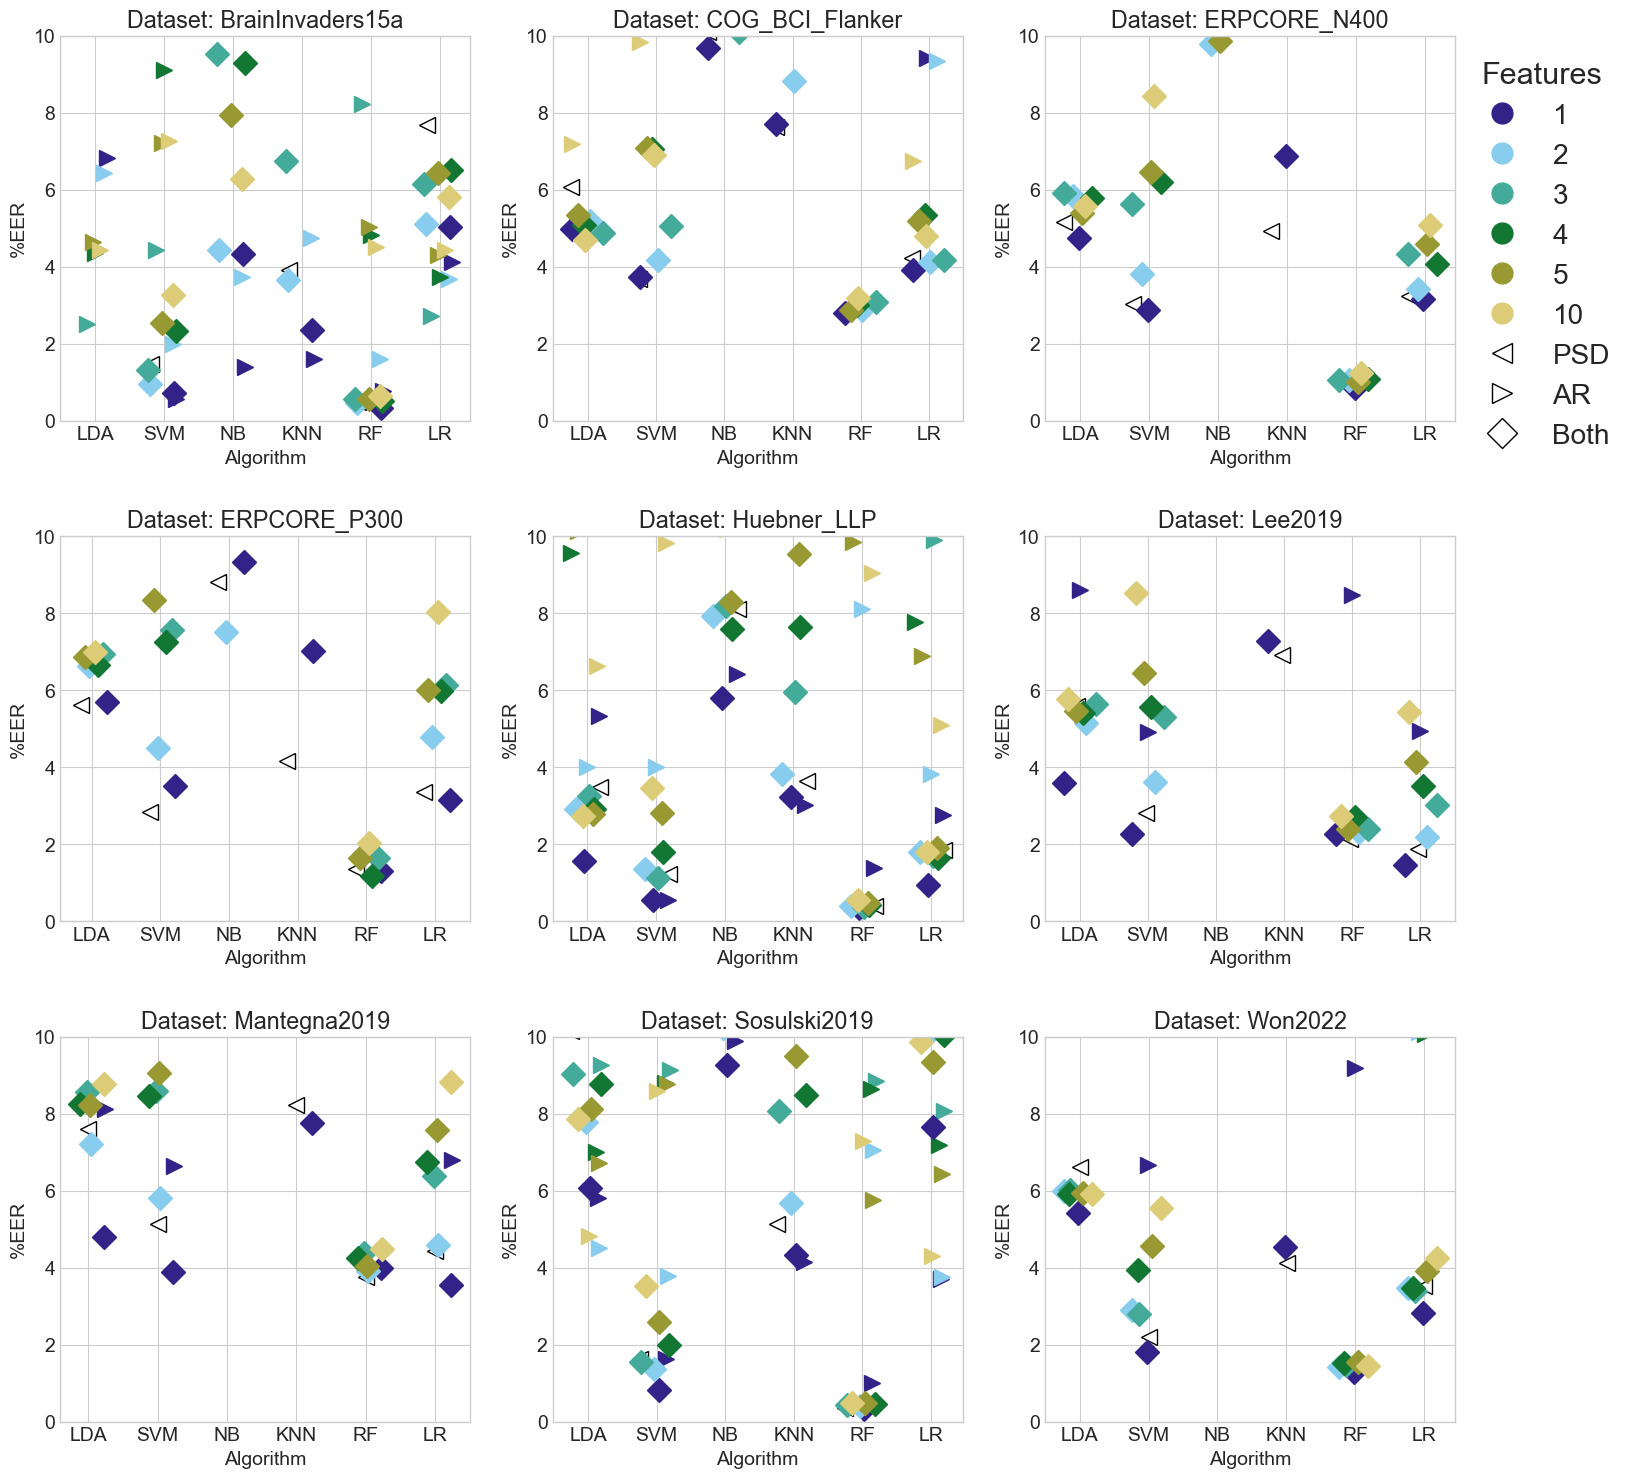

In [20]:
#tasks=["ERPCORE_P300","ERPCORE_N400","COG_BCI_Flanker","Huebner_LLP","BrainInvaders15a","Won2022","Mantegna2019","Sosulski2019","Lee2019"]
tasks=["BrainInvaders15a","COG_BCI_Flanker","ERPCORE_N400","ERPCORE_P300","Huebner_LLP","Lee2019","Mantegna2019","Sosulski2019","Won2022"]


f1dic={}

for i in tasks:
    f1dic[i]= read_dataset(i)

from matplotlib import pyplot as plt2
import pickle
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
plt2.style.use('seaborn-whitegrid')
from random import seed
from random import random
# seed random number generator
seed(1)
# generate some random numbers

font = {
        'size'   : 14}

plt2.rc('font', **font)

model=["LDA","SVM","NB","KNN","RF","LR"]
kind=["PSD","AR","Both"]
tasksd={"S1P300":"P300:Selected","S2P300":"P300:Assigned","N400words":"N400:Words","N400sent":"N400:Sentences","Faces":"N400:Faces"}
pp=[1,2,3,4,5,10]

ppd={1:'#332288',2:"#88CCEE",3:"#44AA99",4:"#117733",5:"#999933",10:"#DDCC77"}
kindd={"PSD":"<","AR":">","Both":'D'}

x = np.asarray([1,2,3,4,5,6])

# Create a 3x3 grid of subplots with increased overall size
fig, axs = plt2.subplots(3, 3, figsize=(18, 18))
fig.subplots_adjust(hspace=0.3)  # Decrease vertical margin between subplots

for idx, ta in enumerate(tasks):
    print(ta)
    row, col = divmod(idx, 3)
    flagpsd = 0

    for kk in kind:
        for jjj in pp:
            if kk == "PSD" and flagpsd == 0:
                axs[row, col].plot(x + ((random() - 0.5) / 2), f1dic[ta][kk][jjj], color="black", marker=kindd[kk],
                                   linestyle='None', markersize=12, label=str(kk) + str(jjj), markerfacecolor='white')
                flagpsd = 1
            elif kk == "PSD" and flagpsd == 1:
                continue
            else:
                axs[row, col].plot(x + ((random() - 0.5) / 2), f1dic[ta][kk][jjj], color=ppd[jjj], marker=kindd[kk],
                                   linestyle='None', markersize=12, label=str(kk) + str(jjj))

    axs[row, col].set_xticks(x)
    axs[row, col].set_xticklabels(model)
    axs[row, col].set_title("Dataset: "+ta)
    axs[row, col].set_ylim(ymax=10, ymin=0)
    axs[row, col].set_ylabel('%EER')
    axs[row, col].set_xlabel('Algorithm')

# Create a single legend for all subplots with larger elements
legend_elements =[ Line2D([0], [0], marker='o', color='#332288', label='1',
                    markerfacecolor='#332288', markersize=15,linestyle='None'),
                  Line2D([0], [0], marker='o', color='#88CCEE', label='2',
                    markerfacecolor='#88CCEE', markersize=15,linestyle='None'),
                  Line2D([0], [0], marker='o', color='#44AA99', label='3',
                    markerfacecolor='#44AA99', markersize=15,linestyle='None'),
                  Line2D([0], [0], marker='o', color='#117733', label='4',
                    markerfacecolor='#117733', markersize=15,linestyle='None'),
                    Line2D([0], [0], marker='o', color='#999933', label='5',
                    markerfacecolor='#999933', markersize=15,linestyle='None'),
                    Line2D([0], [0], marker='o', color='#DDCC77', label='10',
                    markerfacecolor='#DDCC77', markersize=15,linestyle='None'),
                    Line2D([0], [0], marker='<', color='black', label='PSD',
                    markerfacecolor='white', markersize=15,linestyle='None'),
                    Line2D([0], [0], marker='>', color='black', label='AR',
                    markerfacecolor='white', markersize=15,linestyle='None'),
                    Line2D([0], [0], marker='D', color='black', label='Both',
                    markerfacecolor='white', markersize=15,linestyle='None')
                    ]
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.00, 0.88), fontsize='x-large', title="Features", title_fontsize=22)

# Save the entire figure
#plt2.savefig("Feature_Extraction_plot.pdf")
plt2.show()
